# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Introduction-to-OpenCV" data-toc-modified-id="Introduction-to-OpenCV-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction to OpenCV</a></div><div class="lev2 toc-item"><a href="#Intro-and-loading-Images" data-toc-modified-id="Intro-and-loading-Images-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Intro and loading Images</a></div><div class="lev2 toc-item"><a href="#Loading-Video-Source" data-toc-modified-id="Loading-Video-Source-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Loading Video Source</a></div><div class="lev2 toc-item"><a href="#Drawing-and-Writing-on-Image" data-toc-modified-id="Drawing-and-Writing-on-Image-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Drawing and Writing on Image</a></div><div class="lev2 toc-item"><a href="#Image-arithmetics-and-Logic" data-toc-modified-id="Image-arithmetics-and-Logic-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Image arithmetics and Logic</a></div><div class="lev2 toc-item"><a href="#Thresholding" data-toc-modified-id="Thresholding-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Thresholding</a></div><div class="lev2 toc-item"><a href="#Color-Filtering" data-toc-modified-id="Color-Filtering-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>Color Filtering</a></div><div class="lev2 toc-item"><a href="#Blurring-and-Smoothing" data-toc-modified-id="Blurring-and-Smoothing-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>Blurring and Smoothing</a></div><div class="lev2 toc-item"><a href="#Morphological-Transformations" data-toc-modified-id="Morphological-Transformations-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>Morphological Transformations</a></div><div class="lev2 toc-item"><a href="#Edge-Detection-and-Gradients" data-toc-modified-id="Edge-Detection-and-Gradients-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>Edge Detection and Gradients</a></div><div class="lev2 toc-item"><a href="#Template-Matching" data-toc-modified-id="Template-Matching-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>Template Matching</a></div><div class="lev2 toc-item"><a href="#GrabCut-Foreground-Extraction" data-toc-modified-id="GrabCut-Foreground-Extraction-111"><span class="toc-item-num">1.11&nbsp;&nbsp;</span>GrabCut Foreground Extraction</a></div><div class="lev2 toc-item"><a href="#Corner-Detection" data-toc-modified-id="Corner-Detection-112"><span class="toc-item-num">1.12&nbsp;&nbsp;</span>Corner Detection</a></div><div class="lev2 toc-item"><a href="#Feature-Matching-(Homography)-Brute-Force" data-toc-modified-id="Feature-Matching-(Homography)-Brute-Force-113"><span class="toc-item-num">1.13&nbsp;&nbsp;</span>Feature Matching (Homography) Brute Force</a></div>

# Introduction to OpenCV

In [16]:
from time import sleep

import cv2
import matplotlib.pyplot as plt
import numpy as np
import signal
import sys
import traceback

In [ ]:
def signal_handler(signal, frame):
    # KeyboardInterrupt detected, exiting
    global is_interrupted
    is_interrupted = True

In [2]:
def bgr2rgb(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2RGB)

def bgr2gray(im):
    return cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)

## Intro and loading Images    

In [ ]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=Z78zbnLlPUA&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

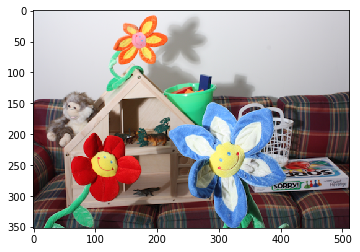

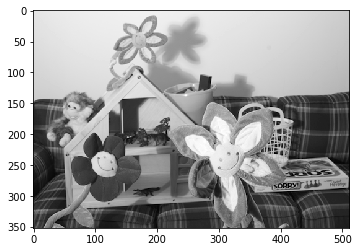

In [3]:
%matplotlib inline
img = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)

# cv2.imshow('title image', img)
# cv2.destroyAllWindows()

img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.imshow(img_rgb, 'gnuplot2')
plt.show()

plt.imshow(img_gray, 'gray')
plt.show()

plt.close()

## Loading Video Source

In [ ]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=Jvf5y21ZqtQ&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=2

<IPython.core.display.Javascript object>


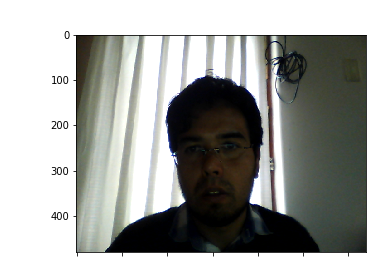

/home/xmn/anaconda3/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)
IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


In [26]:
%matplotlib notebook
vc = cv2.VideoCapture(0)

# codec
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter(
    filename='out.avi', 
    fourcc=fourcc, 
    fps=8.0, 
    frameSize=(640, 480)
)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame, cmap='gnuplot2')    
else:
    is_capturing = False


is_interrupted = False
signal.signal(signal.SIGINT, signal_handler)

while is_capturing:
    is_capturing, frame = vc.read()
    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    webcam_preview.set_data(frame_rgb)
    out.write(frame)
    
    plt.draw()
    
    try:
        plt.pause(0.05)
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        out.release()
        break

plt.ioff()
plt.close()

## Drawing and Writing on Image

In [ ]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=U6uIrq2eh_o&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=3

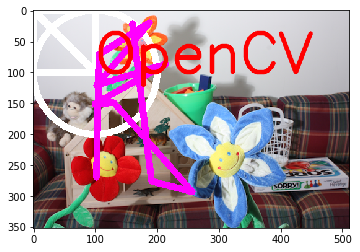

In [39]:
%matplotlib inline
np.random.seed(42)
img = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

cv2.line(
    img=img, pt1=(0, 0), pt2=(100, 100), 
    color=(255, 255, 255), thickness=10, 
    lineType=8, shift=0
)
cv2.rectangle(
    img=img, pt1=(0, 0), pt2=(100, 100), 
    color=(255, 255, 255), thickness=10, 
    lineType=8, shift=0
)
cv2.circle(
    img=img, center=(100, 100),
    radius=100,
    color=(255, 255, 255), thickness=10, 
    lineType=8, shift=0
)

pts = np.array(
    np.random.randint(0, 300, 20)
).reshape((10, 2))

cv2.polylines(
    img=img, pts=[pts], isClosed=False,
    color=(255, 0, 255), thickness=10, 
    lineType=8, shift=0
)

font = cv2.FONT_HERSHEY_SIMPLEX
cv2.putText(
    img=img,
    text='OpenCV',
    org=(100, 100),
    fontFace=font,
    fontScale=3,
    color=(255, 0, 0),
    thickness=5,
    lineType=cv2.LINE_AA,
    bottomLeftOrigin=False
)

plt.imshow(img, 'gnuplot2')
plt.show()
plt.close()

## Image arithmetics and Logic

In [60]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=_gfNpJmWIug&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=5

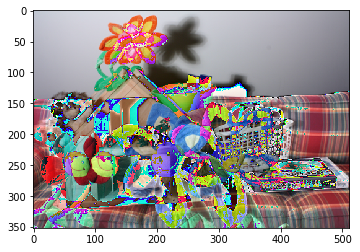

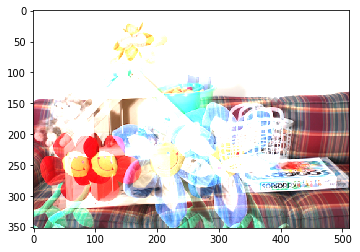

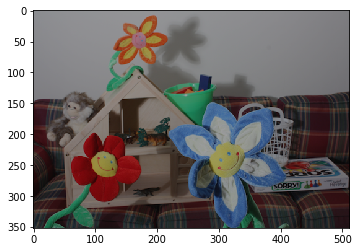

In [61]:
%matplotlib inline
np.random.seed(42)

img1 = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('flowers-right.png', cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)

plt.imshow(img1 + img2, 'gnuplot2')
plt.show()

plt.imshow(cv2.add(img1, img2), 'gnuplot2')
plt.show()

imgw = cv2.addWeighted(img1, 0.6, img2, 0,4, 0)
plt.imshow(imgw, 'gnuplot2')
plt.show()

roi


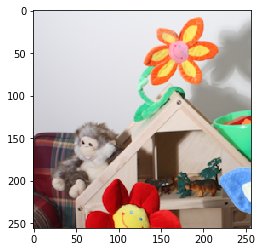

mask


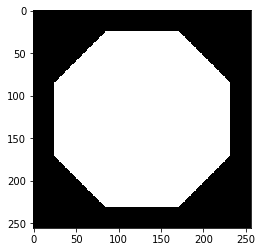

img1_bg


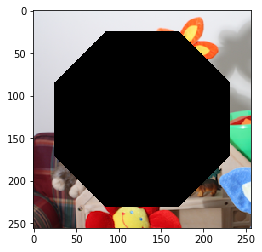

img2_fg


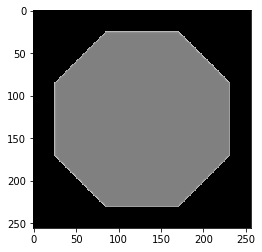

new_img


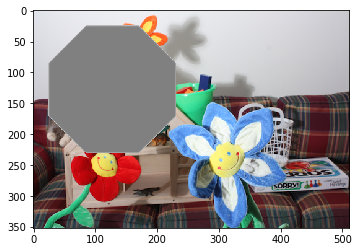

In [67]:
img1 = cv2.imread('flowers-left.png', cv2.IMREAD_COLOR)
img2 = cv2.imread('octagon.png', cv2.IMREAD_COLOR)

img1 = cv2.cvtColor(src=img1, code=cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(src=img2, code=cv2.COLOR_BGR2RGB)

# roi = subsection of img1 with shape equal to img2
rows, cols, channels = img2.shape
roi = img1[:rows, :cols]

print('roi')
plt.imshow(roi, 'gnuplot2')
plt.show()

# create a mask with img2
img2gray = cv2.cvtColor(src=img2, code=cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(
    src=img2gray, thresh=200, maxval=255, 
    type=cv2.THRESH_BINARY_INV
)

print('mask')
plt.imshow(mask, 'gnuplot2')
plt.show()

# invert mask
mask_inv = cv2.bitwise_not(src=mask)

# copy data contained in the mask_inv area 
# (background of img2) on img1
img1_bg = cv2.bitwise_and(src1=roi, src2=roi, mask=mask_inv)
# copy data contained in the mask area on img2 (with no background)
img2_fg = cv2.bitwise_and(src1=img2, src2=img2, mask=mask)

print('img1_bg')
plt.imshow(img1_bg, 'gnuplot2')
plt.show()

print('img2_fg')
plt.imshow(img2_fg, 'gnuplot2')
plt.show()

# joins img1_bg and img2_fg
dst = cv2.add(src1=img1_bg, src2=img2_fg)

# updates img1
img = img1.copy()
img[:rows, :cols] = dst

print('new_img')
plt.imshow(img, 'gnuplot2')
plt.show()

plt.close()

## Thresholding

In [68]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=jXzkxsT9gxM&index=6&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

original


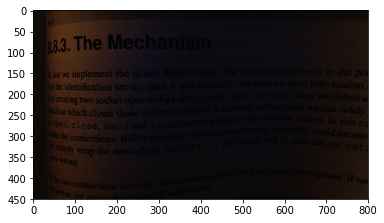

grayscaled


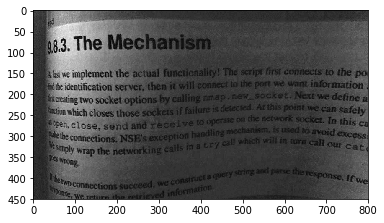

threshold


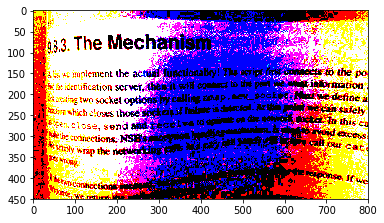

grayscaled binary threshold


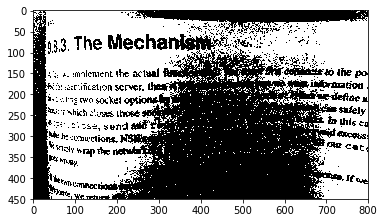

grayscaled otsu threshold


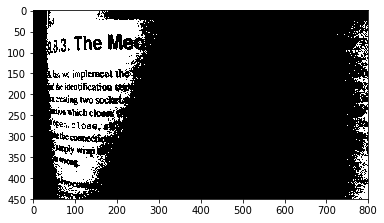

grayscaled gaussian threshold


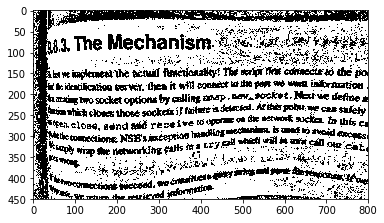

In [90]:
%matplotlib inline
img = cv2.imread(filename='bookpage.jpg', flags=cv2.IMREAD_COLOR)
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2RGB)

grayscaled = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

retval, threshold = cv2.threshold(
    src=img, thresh=12, maxval=255, 
    type=cv2.THRESH_BINARY
)

retval, gray_binary_threshold = cv2.threshold(
    src=grayscaled, thresh=12, maxval=255, 
    type=cv2.THRESH_BINARY
)

retval, gray_otsu_threshold = cv2.threshold(
    src=grayscaled, thresh=152, maxval=255, 
    type=cv2.THRESH_OTSU
)

gaus = cv2.adaptiveThreshold(
    src=grayscaled, maxValue=255, 
    adaptiveMethod=cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
    thresholdType=cv2.THRESH_BINARY, 
    blockSize=115, C=1
)

print('original')
plt.imshow(X=img, cmap='gnuplot2')
plt.show()

print('grayscaled')
plt.imshow(X=grayscaled, cmap='gray')
plt.show()

print('threshold')
plt.imshow(X=threshold, cmap='gnuplot2')
plt.show()

print('grayscaled binary threshold')
plt.imshow(X=gray_binary_threshold, cmap='gray')
plt.show()

print('grayscaled otsu threshold')
plt.imshow(X=gray_otsu_threshold, cmap='gray')
plt.show()

print('grayscaled gaussian threshold')
plt.imshow(X=gaus, cmap='gray')
plt.show()

plt.close()

## Color Filtering

In [92]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=CCOXg75HkvM&index=7&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

<IPython.core.display.Javascript object>


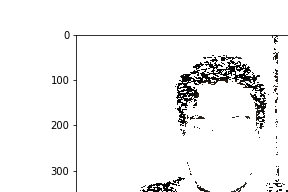

/home/xmn/anaconda3/lib/python3.6/site-packages/matplotlib/backend_bases.py:2453: MatplotlibDeprecationWarning: Using default event loop until function specific to this GUI is implemented
  warnings.warn(str, mplDeprecation)


In [101]:
%matplotlib notebook
vc = cv2.VideoCapture(0)

plt.ion()

if vc.isOpened(): # try to get the first frame
    is_capturing, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    webcam_preview = plt.imshow(frame, cmap='gnuplot2')    
else:
    is_capturing = False

is_interrupted = False
signal.signal(signal.SIGINT, signal_handler)

lower_red = np.uint8([0, 0, 0])
upper_red = np.uint8([80, 155, 55])

while is_capturing:
    is_capturing, frame = vc.read()
    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(src=frame_hsv, lowerb=lower_red, upperb=upper_red)
    frame_res = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
    frame_rgb = cv2.cvtColor(frame_res, cv2.COLOR_BGR2RGB)
    
    # background equal to white
    frame_rgb[frame_rgb==0] = 255
    
    webcam_preview.set_data(A=frame_rgb)
    
    plt.draw()
    
    try:
        plt.pause(0.05)
    except Exception:
        pass
    
    if is_interrupted:
        vc.release()
        break

plt.ioff()
plt.close()

## Blurring and Smoothing

In [12]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=sARklx6sgDk&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=8

original image


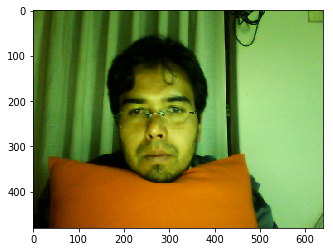

masked image


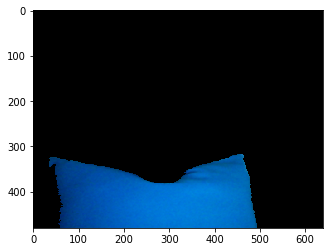

simple filter image


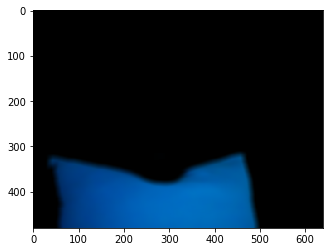

gaussian filter image


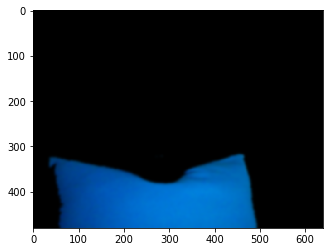

median filter image


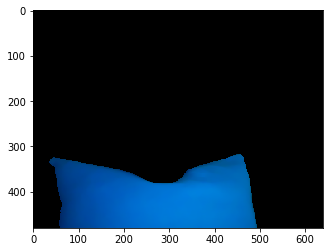

bilateral filter image


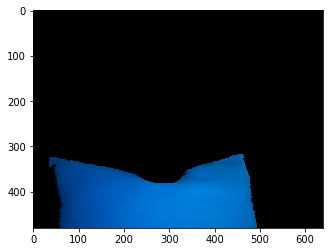

In [28]:
%matplotlib inline
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    _, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    print('original image')
    plt.imshow(X=frame, cmap='gnuplot2')    
    plt.show()

    print('masked image')
    lower_red = np.uint8([100, 50, 100])
    upper_red = np.uint8([200, 255, 255])

    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(src=frame_hsv, lowerb=lower_red, upperb=upper_red)
    
    frame_color_filtered = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
    frame_cf_rgb = cv2.cvtColor(frame_color_filtered, cv2.COLOR_BGR2RGB)
    plt.imshow(X=frame_cf_rgb, cmap='gnuplot2')    
    plt.show()
    
    # background equal to white
    # frame_cf_rgb[frame_cf_rgb==0] = 255
    
    print('simple filter image')
    simple_kernel = np.ones((15, 15), dtype=np.float32)/255
    frame_smoothed = cv2.filter2D(
        src=frame_cf_rgb, ddepth=-1, kernel=simple_kernel
    )
    plt.imshow(X=frame_smoothed, cmap='gnuplot2')    
    plt.show()
    
    print('gaussian filter image')
    gaus_blur = cv2.GaussianBlur(src=frame_cf_rgb, ksize=(15, 15), sigmaX=0)
    plt.imshow(X=gaus_blur, cmap='gnuplot2')    
    plt.show()
    
    print('median filter image')
    median_blur = cv2.medianBlur(src=frame_cf_rgb, ksize=15)
    plt.imshow(X=median_blur, cmap='gnuplot2')    
    plt.show()
    
    print('bilateral filter image')
    bilateral_blur = cv2.bilateralFilter(
        src=frame_cf_rgb, d=15, sigmaColor=75, sigmaSpace=75
    )
    plt.imshow(X=bilateral_blur, cmap='gnuplot2')    
    plt.show()
    
    
vc.release()

plt.close()

## Morphological Transformations

In [30]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=sARklx6sgDk&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=8

original image


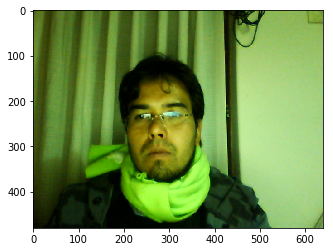

masked image


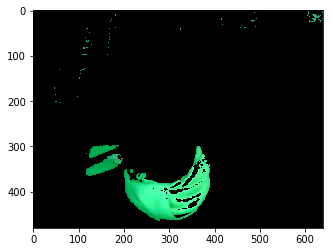

erosion transformation


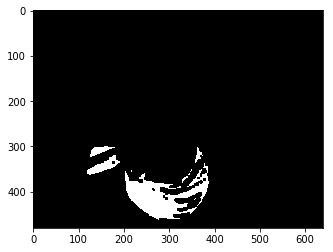

dilation transformation


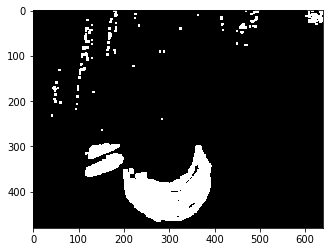

opening transformation


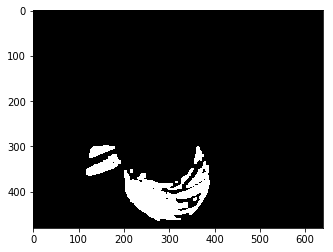

closing transformation


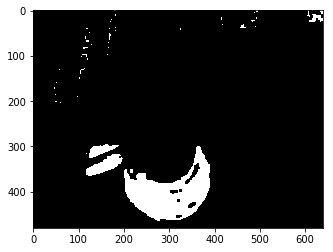

In [49]:
%matplotlib inline
vc = cv2.VideoCapture(0)

if vc.isOpened(): # try to get the first frame
    _, frame = vc.read()
    # cv2.COLOR_BGR2RGB
    # makes the blues image look real colored
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    
    print('original image')
    plt.imshow(X=frame, cmap='gnuplot2')    
    plt.show()

    print('masked image')
    lower_red = np.uint8([0, 170, 150])
    upper_red = np.uint8([80, 255, 255])

    # makes the blues image look real colored
    # cv2.COLOR_BGR2RGB
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    
    mask = cv2.inRange(src=frame_hsv, lowerb=lower_red, upperb=upper_red)
    
    frame_color_filtered = cv2.bitwise_and(src1=frame, src2=frame, mask=mask)
    frame_cf_rgb = cv2.cvtColor(frame_color_filtered, cv2.COLOR_BGR2RGB)

    plt.imshow(X=frame_cf_rgb, cmap='gnuplot2')    
    plt.show()
    
    kernel = np.ones(shape=(5, 5), dtype=np.uint8)
    
    print('erosion transformation')    
    erosion = cv2.erode(src=mask, kernel=kernel, iterations=1)
    plt.imshow(X=erosion, cmap='gnuplot2')    
    plt.show()
    
    print('dilation transformation')
    dilation = cv2.dilate(src=mask, kernel=kernel, iterations=1)
    plt.imshow(X=dilation, cmap='gnuplot2')    
    plt.show()
    
    print('opening transformation')
    opening = cv2.morphologyEx(src=mask, op=cv2.MORPH_OPEN, kernel=kernel)
    plt.imshow(X=opening, cmap='gnuplot2')    
    plt.show()
    
    print('closing transformation')
    closing = cv2.morphologyEx(src=mask, op=cv2.MORPH_CLOSE, kernel=kernel)
    plt.imshow(X=closing, cmap='gnuplot2')    
    plt.show()
    
    
vc.release()

plt.close()

## Edge Detection and Gradients

In [3]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=CJMCoAsK-h0&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq&index=10

original image


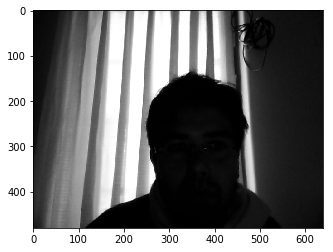

laplacian


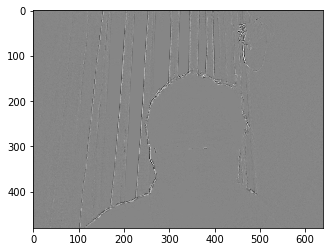

sobelx


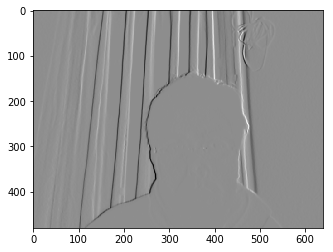

sobely


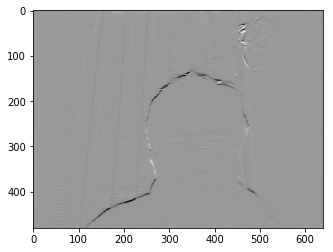

edges


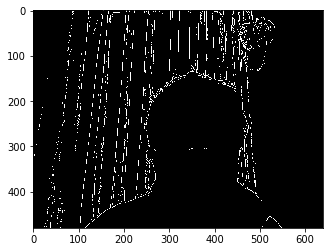

In [25]:
%matplotlib inline
vc = cv2.VideoCapture(0)

try:
    if vc.isOpened(): # try to get the first frame
        _, frame = vc.read()
        
        frame = bgr2gray(frame)
        
        laplacian = cv2.Laplacian(src=frame, ddepth=cv2.CV_64F)
        sobelx = cv2.Sobel(
            src=frame, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5
        )
        sobely = cv2.Sobel(
            src=frame, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5
        )
        edges = cv2.Canny(image=frame, threshold1=50, threshold2=50)

        print('original image')
        plt.imshow(X=frame, cmap='gray')    
        plt.show()

        print('laplacian')
        plt.imshow(X=laplacian, cmap='gray')    
        plt.show()

        print('sobelx')
        plt.imshow(X=sobelx, cmap='gray')    
        plt.show()

        print('sobely')
        plt.imshow(X=sobely, cmap='gray')    
        plt.show()
        
        print('edges')
        plt.imshow(X=edges, cmap='gray')    
        plt.show()

    vc.release()
    plt.close()
except Exception as e:
    vc.release()
    plt.close()
    print('[EE]', traceback.format_exc())

## Template Matching

In [26]:
# ref: sentdex
# url: https://www.youtube.com/watch?v=2CZltXv-Gpk&index=11&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

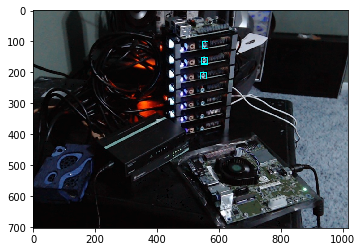

In [34]:
%matplotlib inline
img = cv2.imread(filename='opencv-template-matching-python-tutorial.jpg')
img_gray = bgr2gray(im=img)

template = cv2.imread(filename='opencv-template-for-matching.jpg', flags=0)

w, h = template.shape[::-1]

result = cv2.matchTemplate(
    image=img_gray, templ=template, method=cv2.TM_CCOEFF_NORMED
)
threshold = 0.9

loc = np.where(result >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(
        img=img, 
        pt1=pt, 
        pt2=(pt[0]+w, pt[1]+h), 
        color=(0, 255, 255), 
        thickness=2
    )

plt.imshow(X=img)
plt.show()
plt.close()

## GrabCut Foreground Extraction

In [35]:
"""
# ref1: sentdex
# url1: https://www.youtube.com/watch?v=qxfP13BMhq0&index=12&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq
# ref2: opencv
# url2: http://docs.opencv.org/3.2.0/d8/d83/tutorial_py_grabcut.html

Now we go for grabcut algorithm with OpenCV. OpenCV has the function, 
cv2.grabCut() for this. We will see its arguments first:

* img - Input image
* mask - It is a mask image where we specify which areas are background, 
    foreground or probable background/foreground etc. It is done by the 
    following flags, cv2.GC_BGD, cv2.GC_FGD, cv2.GC_PR_BGD, cv2.GC_PR_FGD, or 
    simply pass 0,1,2,3 to image.
* rect - It is the coordinates of a rectangle which includes the 
    foreground object in the format (x,y,w,h)
* bdgModel, fgdModel - These are arrays used by the algorithm internally. 
    You just create two np.float64 type zero arrays of size (1,65).
* iterCount - Number of iterations the algorithm should run.
* mode - It should be cv2.GC_INIT_WITH_RECT or cv2.GC_INIT_WITH_MASK or 
    combined which decides whether we are drawing rectangle or final 
    touchup strokes.
    
numpy.where(condition[, x, y])
    Returns: out : ndarray or tuple of ndarrays
    If both x and y are specified, the output array contains 
    elements of x where condition is True, and elements from y elsewhere.
    If only condition is given, return the tuple condition.nonzero(), 
    the indices where condition is True.

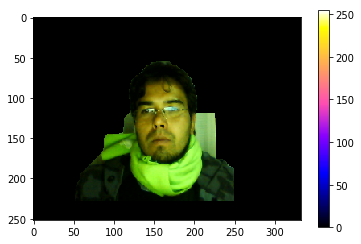

In [50]:
%matplotlib inline
img = cv2.imread(filename='foreground-extraction.jpg', flags=cv2.IMREAD_COLOR)

# It is a mask image where we specify which areas are background, 
# foreground or probable background/foreground etc.
mask = np.zeros(shape=img.shape[:2], dtype=np.uint8)

# These are arrays used by the algorithm internally. 
# You just create two np.float64 type zero arrays of size (1,65).
bgdModel = np.zeros(shape=(1, 65), dtype=np.float64)
fgdModel = np.zeros(shape=(1, 65), dtype=np.float64)

# format (x,y,w,h)
rect = (50, 50, 200, 200)

# Mode should be cv2.GC_INIT_WITH_RECT since we are using rectangle. 
cv2.grabCut(
    img=img, 
    mask=mask, 
    rect=rect, 
    bgdModel=bgdModel, 
    fgdModel=fgdModel, 
    iterCount=5, 
    mode=cv2.GC_INIT_WITH_RECT
)

"""
The grabCut modifies the mask image. In the new mask image, 
pixels will be marked with four flags denoting background/foreground 
as specified above (see mask parameter description). 
So we modify the mask such that all 0-pixels and 2-pixels 
are put to 0 (ie background) and all 1-pixels and 3-pixels are put to 1
(ie foreground pixels).

"""

mask2 = np.where((mask==2)|(mask==0), 0, 1).astype('uint8')

# Now our final mask is ready. 
# Just multiply it with input image to get the segmented image.
img = img*mask2[:,:, np.newaxis]

plt.imshow(X=bgr2rgb(img), cmap='gnuplot2')
plt.colorbar()
plt.show()
plt.close()

## Corner Detection

In [51]:
"""
refs:
* sentdex - https://www.youtube.com/watch?v=6e6NbNegChU&index=13&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq

"""

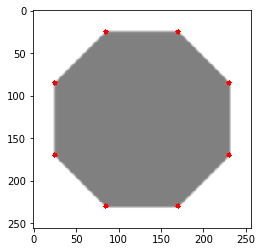

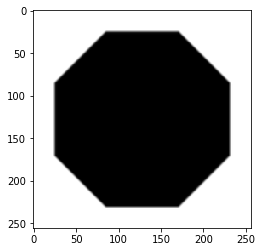

In [58]:
# CV_LOAD_IMAGE_GRAYSCALE
img = cv2.imread('octagon.png', cv2.IMREAD_COLOR)

gray = bgr2gray(img).astype(np.float32)

corners = cv2.goodFeaturesToTrack(
    image=gray, maxCorners=100, qualityLevel=0.01, minDistance=10
).astype(np.int0)

for corner in corners:
    x, y = corner.ravel()
    # thickness = -1 is used to fill circle
    cv2.circle(
        img=img, center=(x, y), radius=3, color=255, thickness=-1
    )

plt.imshow(X=img, cmap='gnuplot2')
plt.show()

plt.close()

## Feature Matching (Homography) Brute Force

In [59]:
"""
refs: 
* sentdex - https://www.youtube.com/watch?v=UquTAf_9dVA&index=14&list=PLQVvvaa0QuDdttJXlLtAJxJetJcqmqlQq
* opencv - http://docs.opencv.org/trunk/dc/dc3/tutorial_py_matcher.html


Basics of Brute-Force Matcher

Brute-Force matcher is simple. It takes the descriptor of one feature in 
first set and is matched with all other features in second set using 
some distance calculation. And the closest one is returned.

"""

TypeError: Image data can not convert to float

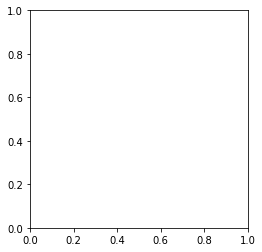

In [76]:
%matplotlib inline

# CV_LOAD_IMAGE_GRAYSCALE
img1 = cv2.imread(
    filename='opencv-feature-matching-template.png', 
    flags=cv2.IMREAD_GRAYSCALE
)
img2 = cv2.imread(
    filename='opencv-feature-matching-image.png', 
    flags=cv2.IMREAD_GRAYSCALE
)

orb = cv2.ORB_create()

kp1, des1 = orb.detectAndCompute(image=img1, mask=None)
kp2, des2 = orb.detectAndCompute(image=img2, mask=None)

"""
For BF matcher, first we have to create the BFMatcher object using 
cv2.BFMatcher(). It takes two optional params. First one is normType. 
It specifies the distance measurement to be used. By default, 
it is cv2.NORM_L2. It is good for SIFT, SURF etc (cv2.NORM_L1 is also there). 
For binary string based descriptors like ORB, BRIEF, BRISK etc, 
cv2.NORM_HAMMING should be used, which used Hamming distance as measurement. 
If ORB is using WTA_K == 3 or 4, cv2.NORM_HAMMING2 should be used.

Second param is boolean variable, crossCheck which is false by default. 
If it is true, Matcher returns only those matches with value (i,j) 
such that i-th descriptor in set A has j-th descriptor in set B as the 
best match and vice-versa. That is, the two features in both sets 
should match each other. It provides consistant result, and is a good 
alternative to ratio test proposed by D.Lowe in SIFT paper.

"""
bf = cv2.BFMatcher(normType=cv2.NORM_HAMMING, crossCheck=True)

"""
Once it is created, two important methods are BFMatcher.match() and 
BFMatcher.knnMatch(). First one returns the best match. 
Second method returns k best matches where k is specified by the user. 
It may be useful when we need to do additional work on that.

"""
matches = bf.match(des1, des2)
matches = sorted(matches, key=lambda x: x.distance)

"""
Like we used cv2.drawKeypoints() to draw keypoints, cv2.drawMatches() 
helps us to draw the matches. It stacks two images horizontally and draw 
lines from first image to second image showing best matches. 
There is also cv2.drawMatchesKnn which draws all the k best matches. 
If k=2, it will draw two match-lines for each keypoint. So we have to pass 
a mask if we want to selectively draw it.

"""
img3 = cv2.drawMatches(
    img1=img1, keypoints1=kp1, 
    img2=img2, keypoints2=kp2, 
    matches1to2=matches[:10], 
    outImg=None, flags=2
)

plt.imshow(X=img3, cmap='gray')
plt.show()

plt.close()